In [3]:
!pip install transformers datasets torch safetensors -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 105.5 MB/s eta 0:00:00


In [13]:
!python /content/train_bert.py --model_name "prajjwal1/bert-tiny" --dataset agnews --dsn \
   --seed 0 --num_epochs 10 --batch_size 32 --max_len 512 --lr 1e-5 \
   --hidden_dropout_prob 0.1 --attention_probs_dropout_prob 0.1 \
   --model_save_location ./model_output_AGNEWS_baseline --early_stopping --early_stopping_patience 6 \
   --early_stopping_threshold 0.0 --save_steps 500 --evaluation_strategy epoch \
   --save_strategy epoch --save_total_limit 2 --metric_for_best_model eval_accuracy \
   --greater_is_better True --scheduler_type linear --scheduler_patience 2 \
   --scheduler_factor 0.5 --scheduler_min_lr 1e-7

2025-10-24 21:20:20.651356: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-10-24 21:20:20.668769: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1761340820.689999    8702 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1761340820.696483    8702 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1761340820.712679    8702 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

In [37]:
# First, uninstall standard transformers
!pip uninstall transformers -y -q

# Clone and install PerforatedAI-Transformers
!git clone https://github.com/PerforatedAI/PerforatedAI-Transformers.git
!cd PerforatedAI-Transformers && pip install -e . -q

# Install PerforatedAI
!pip install perforatedai -q

fatal: destination path 'PerforatedAI-Transformers' already exists and is not an empty directory.
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Building editable for transformers (pyproject.toml) ... done


In [43]:
!python /content/train_bert_pai.py \
  --model_name "prajjwal1/bert-tiny" --dataset agnews \
  --pai_save_name my_pai_run \
  --switch_mode DOING_HISTORY --n_epochs_to_switch 2 --history_lookback 1 \
  --max_dendrites 5 --improvement_threshold 0.0005 \
  --pb_improvement_threshold 0.01 --pb_improvement_threshold_raw 0.001 \
  --unwrapped_modules_confirmed True \
  --seed 0 --num_epochs 10 --batch_size 64 --max_len 128 --lr 2e-5 \
  --hidden_dropout_prob 0.1 --attention_probs_dropout_prob 0.1 \
  --model_save_location ./model_output_PAI_AGNEWS \
  --early_stopping --early_stopping_patience 3 \
  --early_stopping_threshold 0.0 \
  --evaluation_strategy epoch --save_strategy epoch \
  --save_total_limit 5 --metric_for_best_model eval_accuracy \
  --greater_is_better True \
  --scheduler_type linear --scheduler_patience 2 \
  --scheduler_factor 0.5 --scheduler_min_lr 1e-7 \
  --maximizing_score False


2025-10-24 23:20:21.158772: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-10-24 23:20:21.175432: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1761348021.196108   40573 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1761348021.202631   40573 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1761348021.218272   40573 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

Found 11 PAI graphs:

Displaying: my_pai_run.png


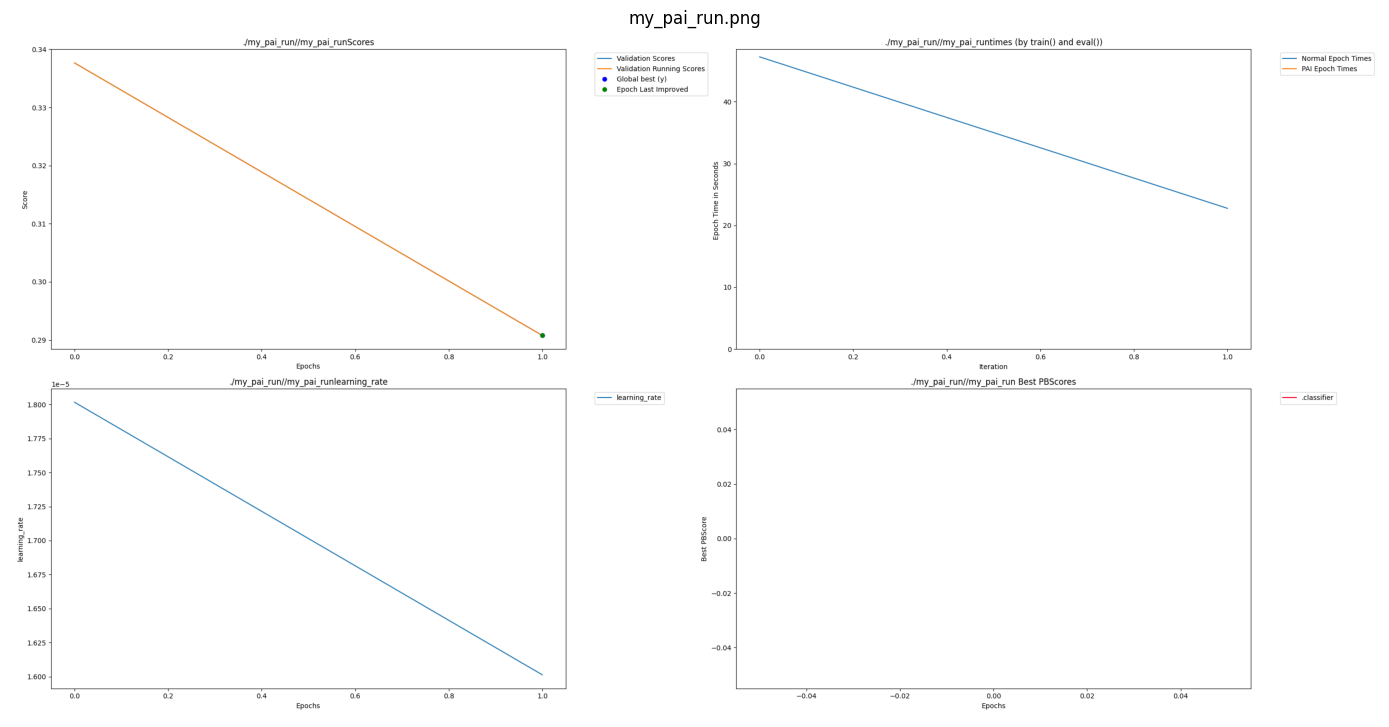



Displaying: my_pai_run_24.10.2025.22.07.48_noImprove_lr_0.png


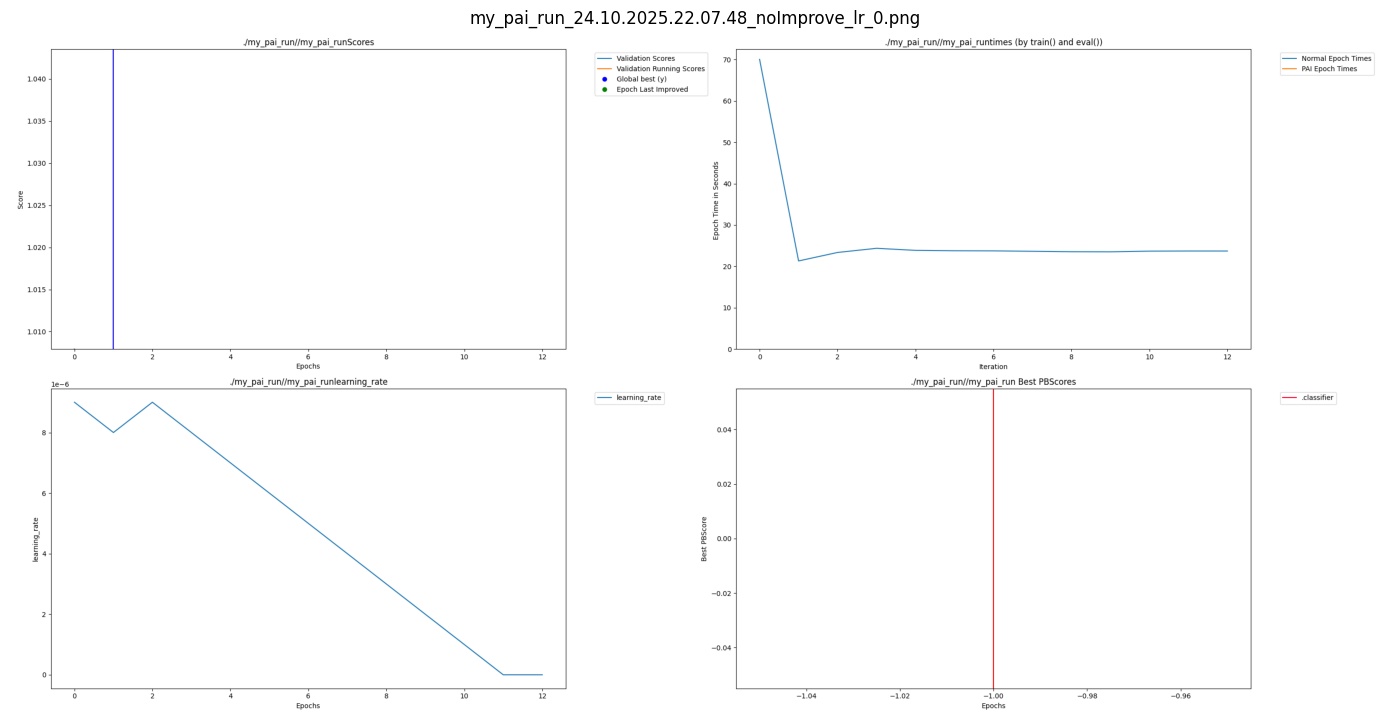



Displaying: my_pai_run_24.10.2025.22.12.11_noImprove_lr_0.png


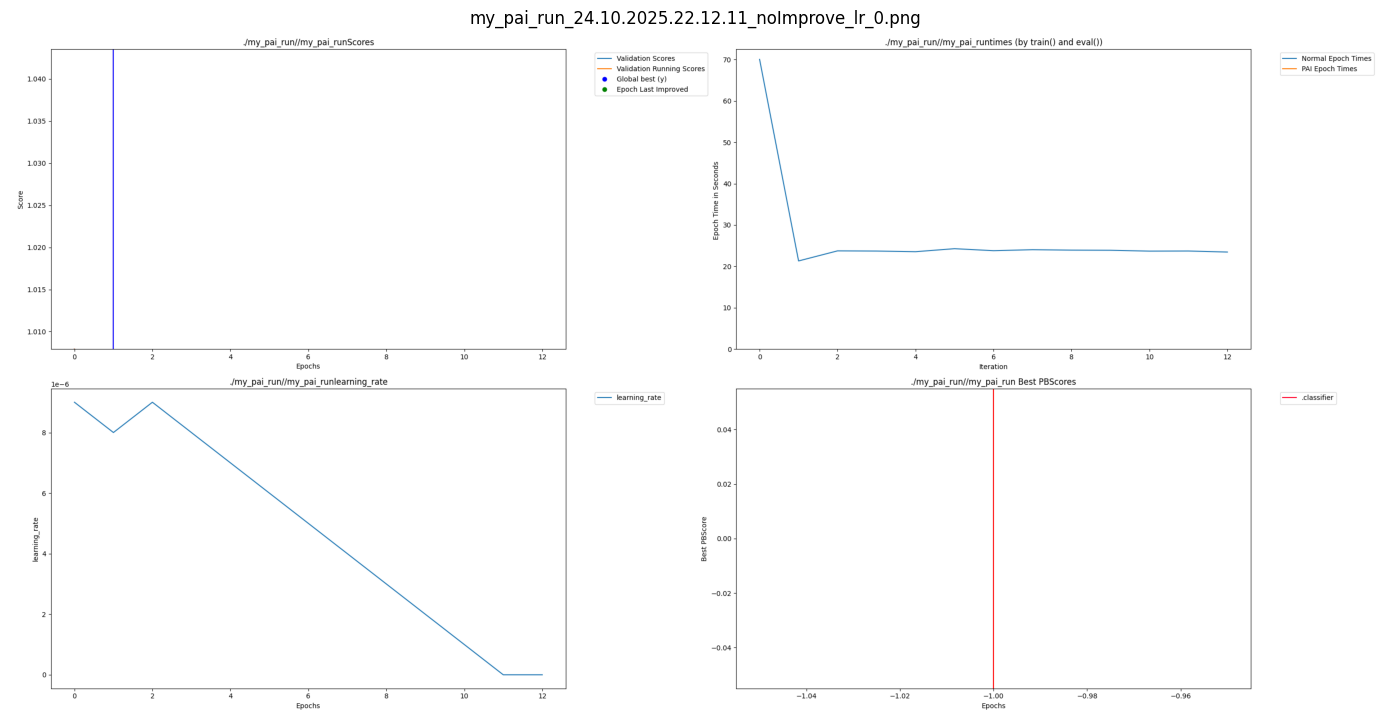



Displaying: my_pai_run_24.10.2025.22.16.34_noImprove_lr_0.png


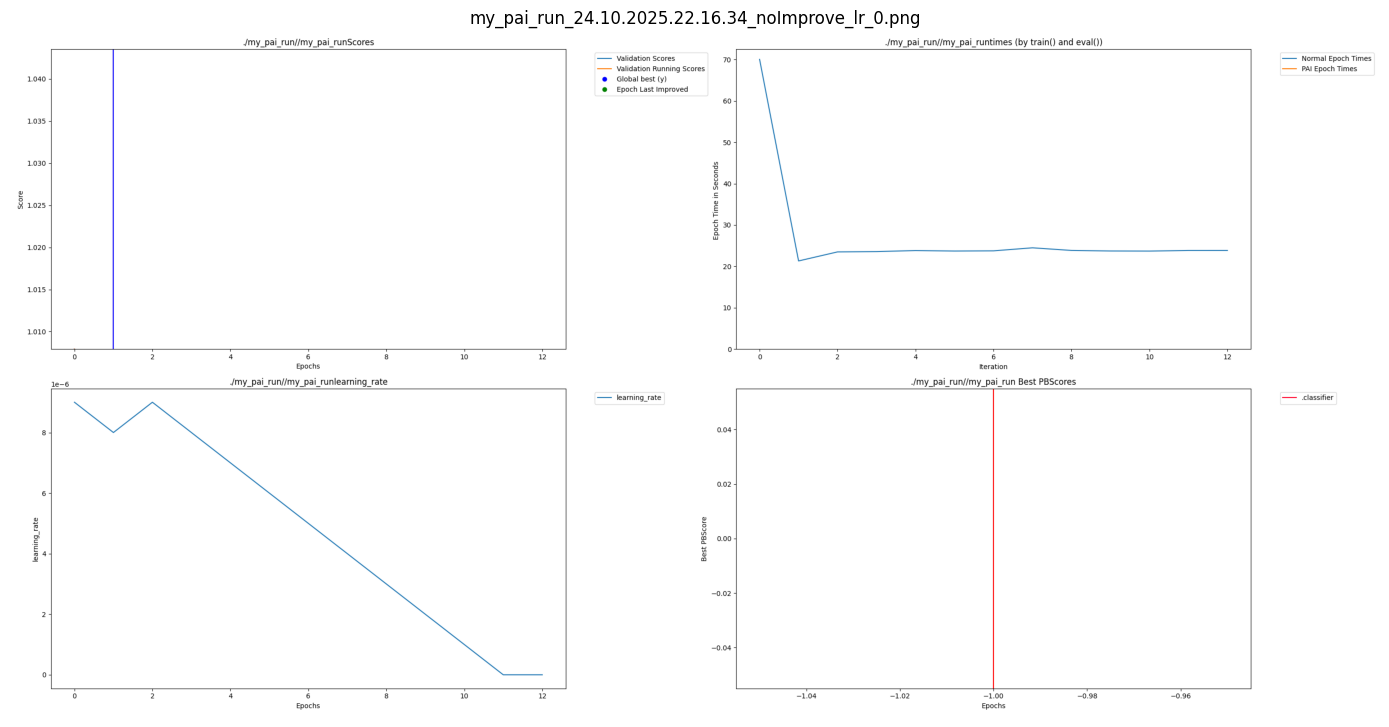



Displaying: my_pai_run_24.10.2025.22.39.26_noImprove_lr_0.png


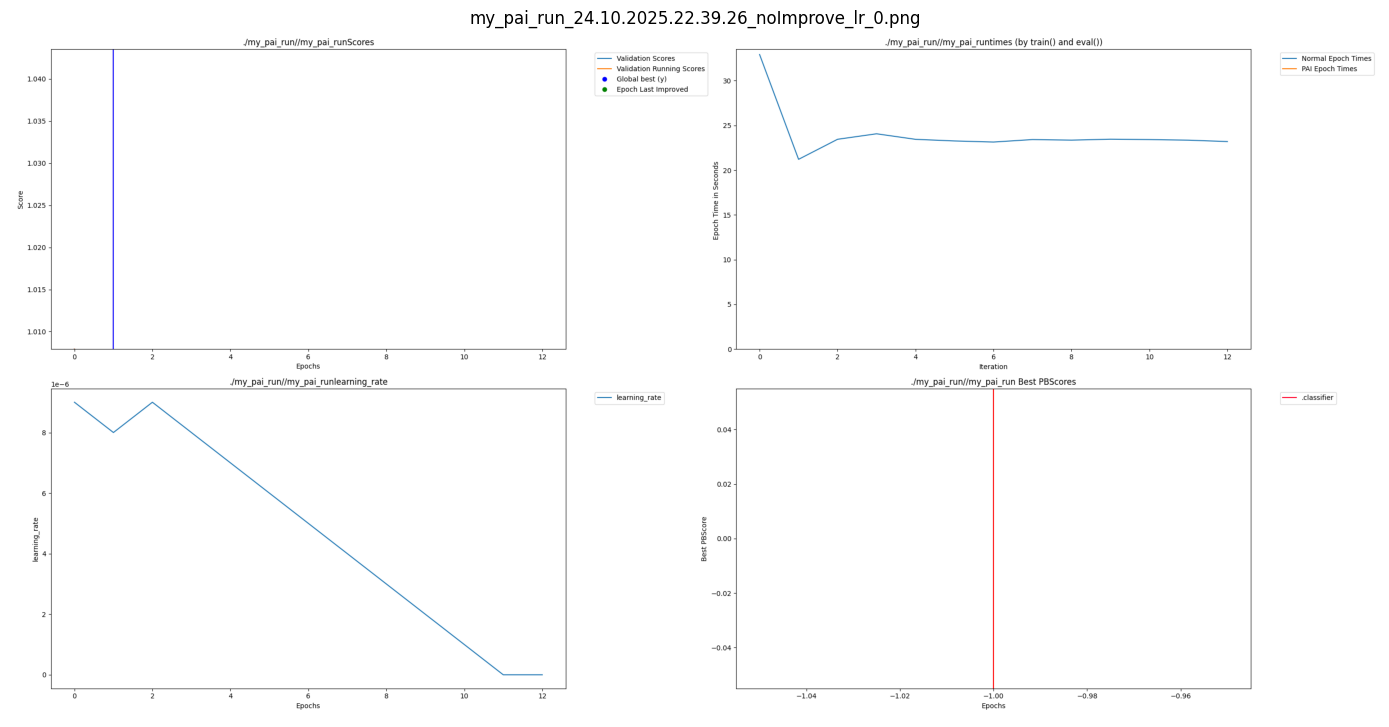



Displaying: my_pai_run_24.10.2025.22.43.45_noImprove_lr_0.png


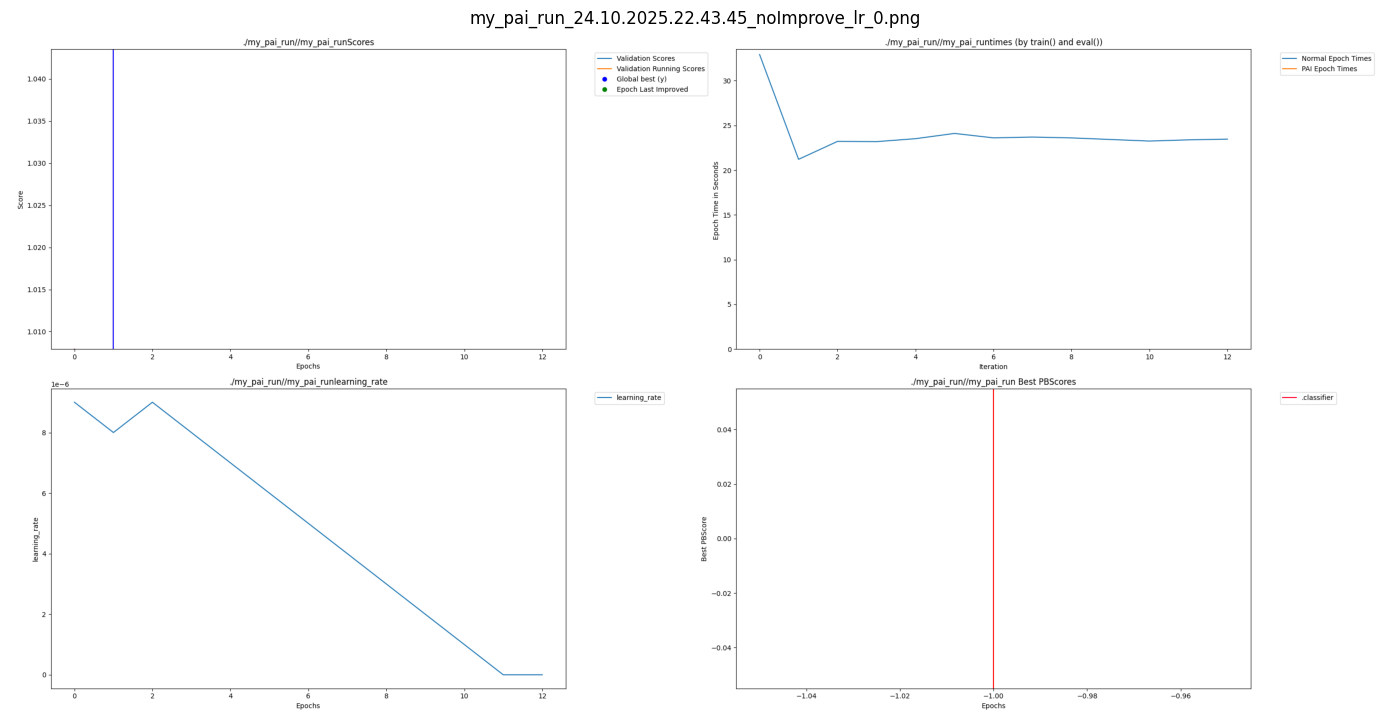



Displaying: my_pai_run_24.10.2025.22.48.05_noImprove_lr_0.png


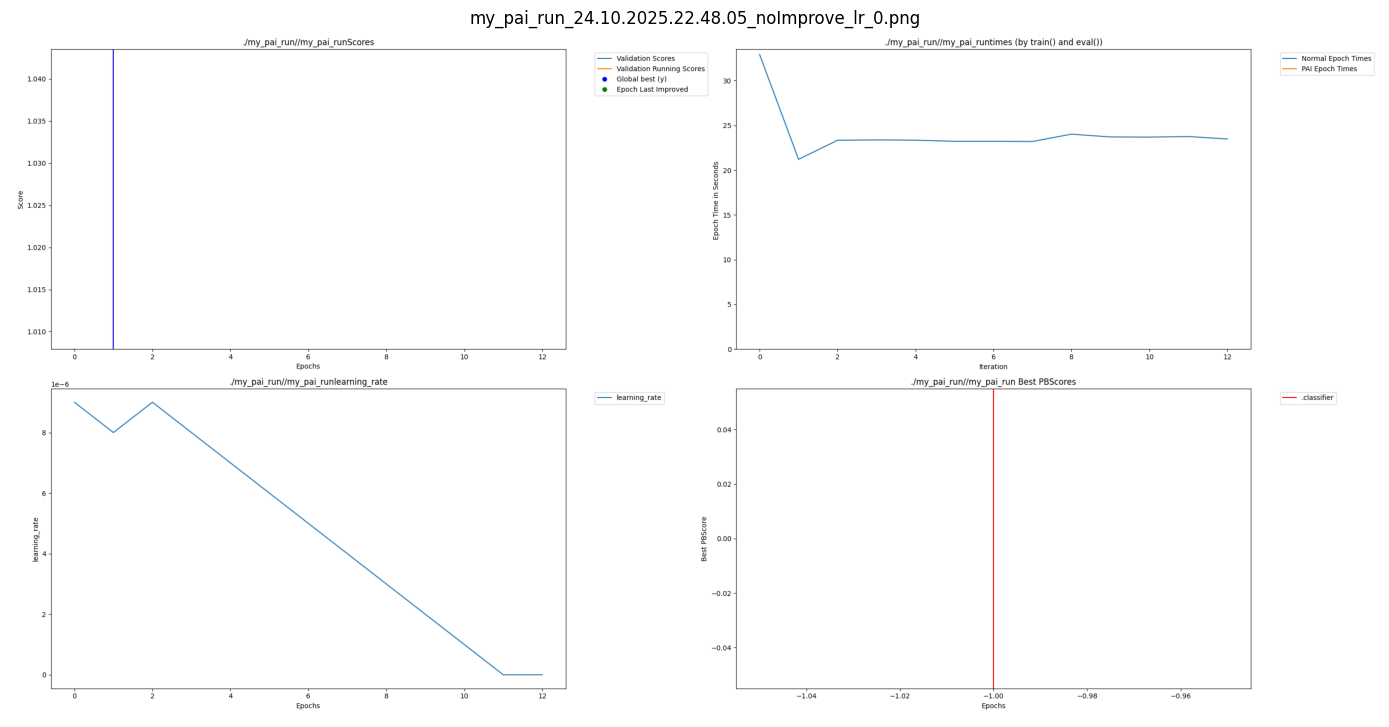



Displaying: my_pai_run_24.10.2025.23.23.31_noImprove_lr_0.png


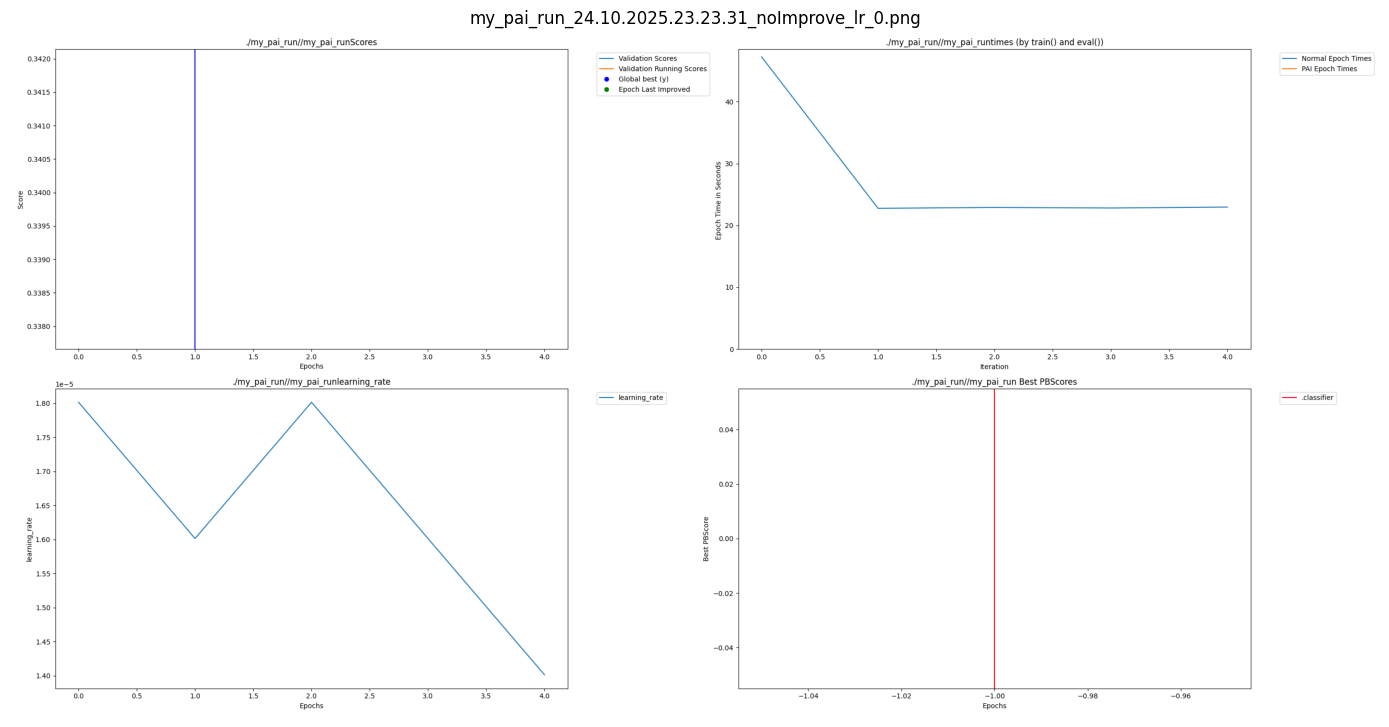



Displaying: my_pai_run_24.10.2025.23.24.43_noImprove_lr_0.png


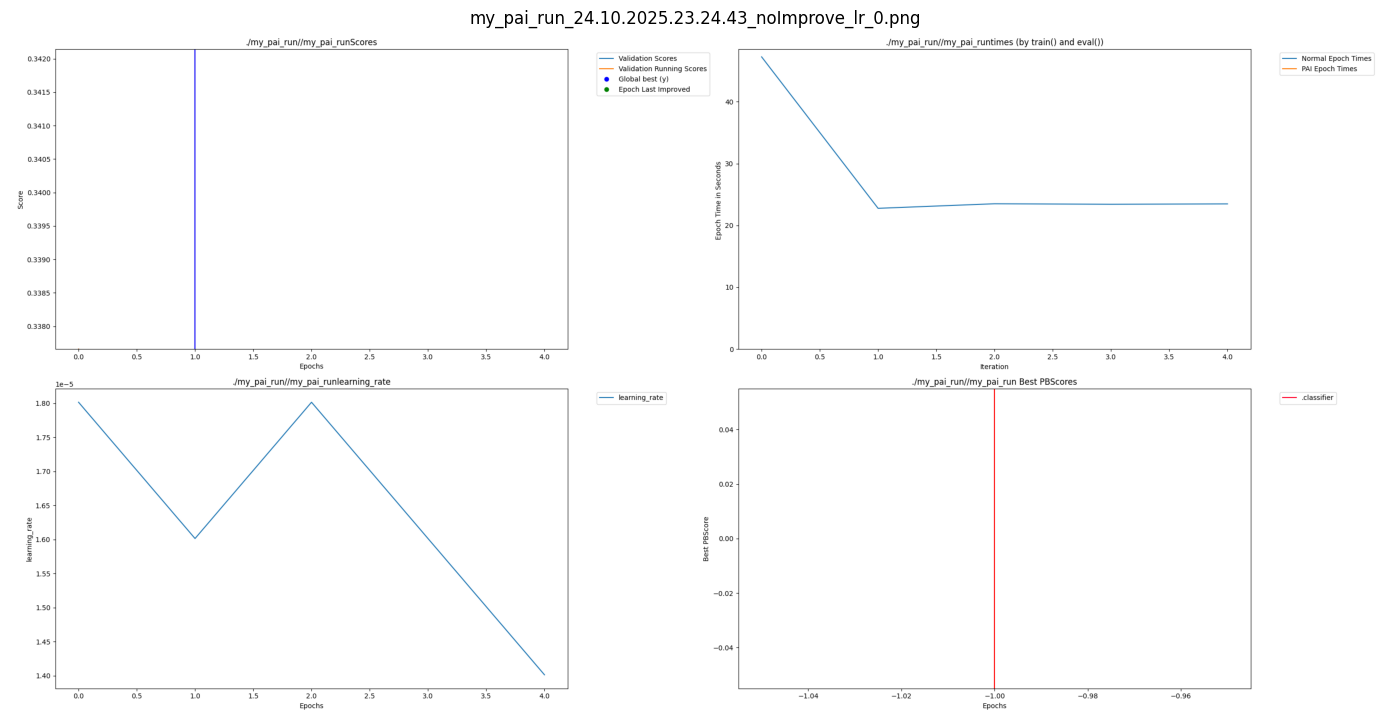



Displaying: my_pai_run_24.10.2025.23.25.54_noImprove_lr_0.png


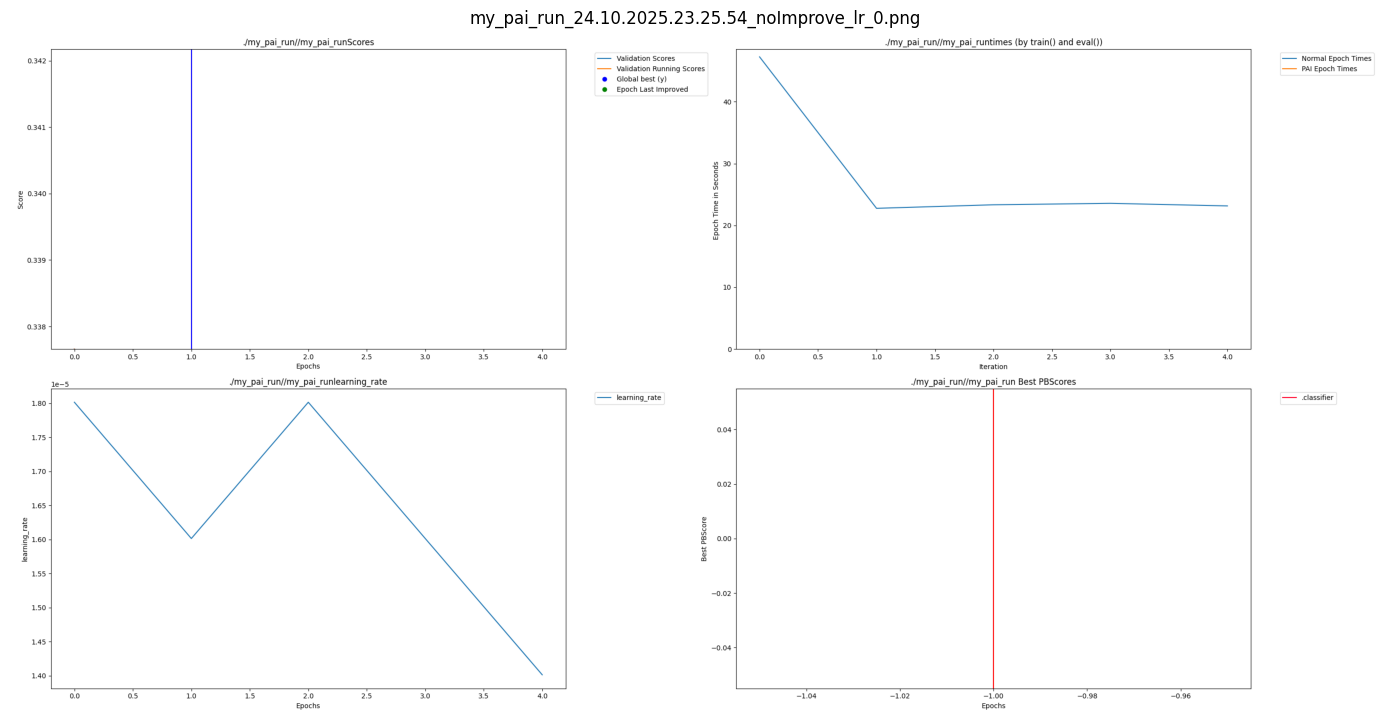



Displaying: my_pai_run_beforeSwitch_0.png


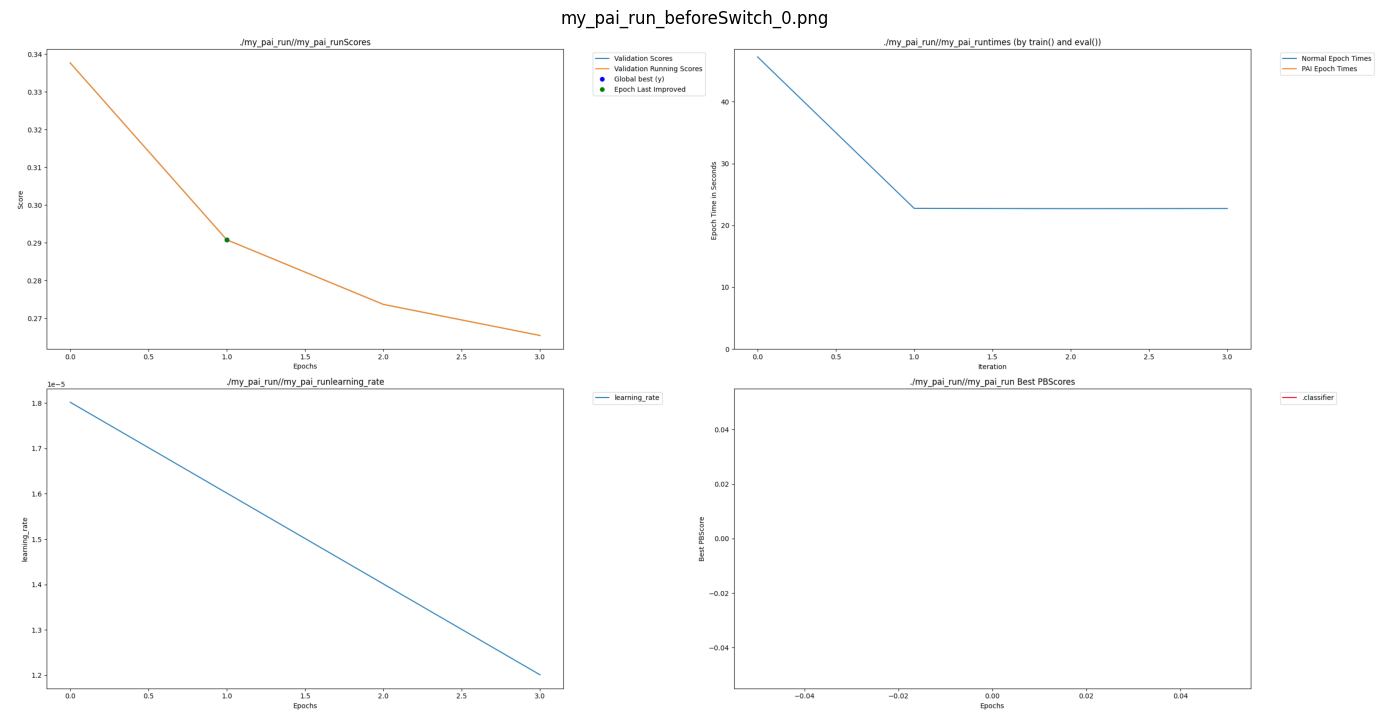

In [49]:
from PIL import Image
import matplotlib.pyplot as plt
import glob
import os

pai_folder = 'my_pai_run'
png_files = sorted(glob.glob(f"{pai_folder}/*.png"))

if png_files:
    print(f"Found {len(png_files)} PAI graphs:\n")
    for png_file in png_files:
        print(f"Displaying: {os.path.basename(png_file)}")
        img = Image.open(png_file)
        plt.figure(figsize=(14, 8))
        plt.imshow(img)
        plt.axis('off')
        plt.title(os.path.basename(png_file))
        plt.tight_layout()
        plt.show()
        print("\n" + "="*60 + "\n")
else:
    print(f"No graphs found in {pai_folder}/")